In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# Cleaning Data

In [237]:
df=pd.read_csv('/content/customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1434,1571-SAVHK,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.95,1132.75,Yes
1207,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,No
5085,7074-STDCN,Male,0,No,No,39,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,40.60,1494.5,No
6939,2758-RNWXS,Male,0,No,No,35,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,No
5090,6502-HCJTI,Male,1,Yes,No,7,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.70,673.1,Yes


In [238]:
df.drop('customerID',axis='columns', inplace=True)

In [239]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [240]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [241]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [242]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [243]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [244]:
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [245]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [246]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


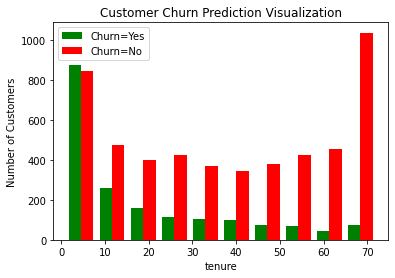

In [248]:
tenure_churn_no=df1[df1['Churn']=='No']['tenure']
tenure_churn_yes=df1[df1['Churn']=='Yes']['tenure']

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

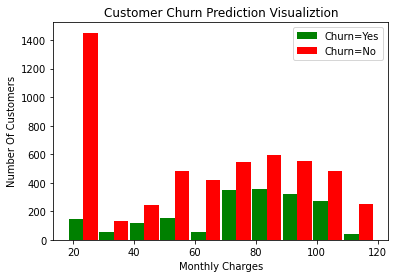

In [249]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [250]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [251]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [252]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [253]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Changing strings to numeric form

In [254]:
df1.replace('Yes',1,inplace=True)
df1.replace('No',0,inplace=True)

In [255]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2354,Male,0,1,1,9,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,19.60,197.40,0
5149,Female,0,0,0,62,1,0,0,0,0,0,0,0,0,Two year,1,Credit card (automatic),19.20,1123.65,0
1196,Male,0,1,0,66,1,1,DSL,1,1,0,1,1,1,Two year,0,Electronic check,85.25,5538.35,0
1031,Male,0,1,1,27,1,1,DSL,0,0,0,1,1,1,Month-to-month,0,Bank transfer (automatic),71.60,1957.10,0
181,Female,0,0,0,1,1,0,DSL,0,0,0,0,0,0,Month-to-month,0,Mailed check,45.30,45.30,0


In [256]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [257]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [258]:
df1['InternetService'].replace(0,'No',inplace=True)
print_unique_col_values(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [259]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [260]:
print_unique_col_values(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


# One-Hot-Encoding Data

In [261]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [262]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2137,0,0,1,1,12,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5530,1,0,0,0,66,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6184,0,0,0,0,41,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3466,0,0,1,1,72,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3427,1,0,1,0,21,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [263]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling Data

In [264]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [265]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5334,1,0,1,1,0.676056,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3572,1,1,0,0,0.436620,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5556,0,0,0,0,0.169014,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [266]:
print_unique_col_values(df2)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Splitting data into train and test datasets

In [267]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [269]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### Hence this dataset is imbalanced

# Training Neural Network

In [270]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )

    if weights==-1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weights=weights)

    print(model.evaluate(x_test,y_test))

    y_preds=model.predict(x_test)
    y_preds=np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test,y_preds))

    return y_preds

In [271]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4801 - accuracy: 0.7724
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8004
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4201 - accuracy: 0.8028
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8048
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8087
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8105
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4048 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4034 - accura

# Method 1 : Undersampling the Majority class

In [272]:
count_class_0,count_class_1=df1['Churn'].value_counts()

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [273]:
count_class_0

5163

In [274]:
count_class_1

1869

In [275]:
df_class_0.shape

(5163, 27)

In [276]:
df_class_1.shape

(1869, 27)

In [277]:
df_class_0_under=df_class_0.sample(count_class_1)

In [278]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [279]:
df_test_under.shape

(3738, 27)

In [280]:
x=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [281]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [282]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [283]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6093 - accuracy: 0.6742
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7579
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7706
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7779
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7799
Epoch 11/

# Comparison with normal Neural Network Model

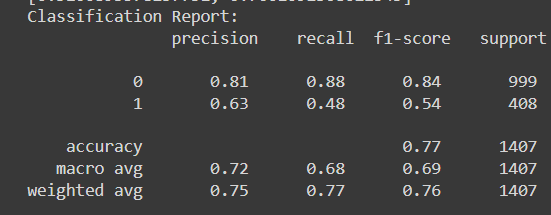

# Method 2 : Oversampling the minority class through duplication

In [284]:
count_class_0,count_class_1

(5163, 1869)

In [285]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [286]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [287]:
df_test_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [288]:
x=df_test_over.drop('Churn', axis='columns')
y=df_test_over['Churn']

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [289]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [290]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [291]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7217
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4938 - accuracy: 0.7605
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7666
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4791 - accuracy: 0.7679
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.7735
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7768
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4666 - accuracy: 0.7775
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7799
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4603 - accuracy: 0.7832
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4581 - accura

# Comparison with normal Neural Network Model

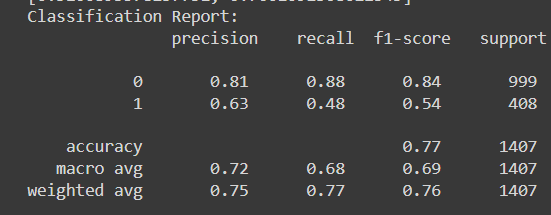

# Method 3 : Oversampling minority class using SMOTE

In [292]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [293]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [294]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [295]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [296]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [297]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [298]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5435 - accuracy: 0.7315
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7770
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.7826
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7843
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7898
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.7923
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7962
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7984
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.7982
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4305 - accura

# Comparison with normal Neural Network Model

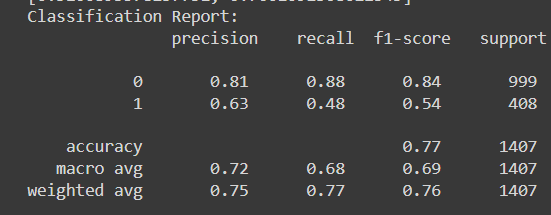

# Method 4 : Use of ensemble with undersampling

In [299]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [300]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [301]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [302]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [303]:
4130/3

1376.6666666666667

In [304]:
df3=X_train.copy()
df3['Churn']=y_train

In [305]:
df3_class_0=df3[df3['Churn']==0]
df3_class_1=df3[df3['Churn']==1]

In [306]:
df3_class_0[:1495].shape

(1495, 27)

In [307]:
df_train=pd.concat([df3_class_0[:1495],df3_class_1],axis=0)

In [308]:
df_train.shape

(2990, 27)

In [309]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)

    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train['Churn']

    return X_train,y_train

In [310]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)

y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5894 - accuracy: 0.7171
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7736
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7742
Epoch 11/

In [311]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)

y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6635 - accuracy: 0.6087
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7298
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7441
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7548
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7696
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7712
Epoch 11/

In [312]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,2990,4130)

y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6335 - accuracy: 0.6717
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7628
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7689
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7731
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7799
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7791
Epoch 11/

In [313]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [314]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.46      0.77      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.72      0.67      1407
weighted avg       0.78      0.70      0.72      1407



# Comparison with normal Neural Network Model

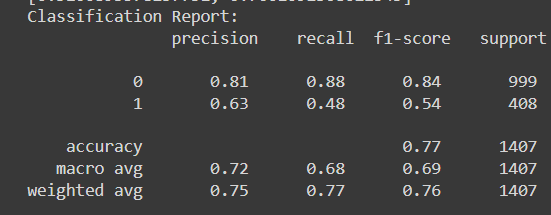

# Method 5 : Use of focal loss as loss

In [315]:
import tensorflow_addons as tfa

In [316]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [317]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [318]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25,gamma=2),
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=100)
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)
print(classification_report(y_test,y_pred))

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.7246
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.7593
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.7643
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.7662
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.7675
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.7751
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.7710
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.7712
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0415 - accuracy: 0.7756
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0414 - accura

# Comparion with normal Neural Network Model

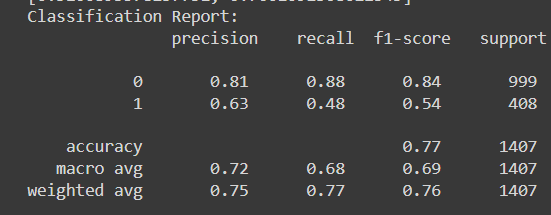

# Hence we can conclude that of all methods, the training of neural network model using SMOTE method improved the model to the greatest extent